In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs

# statisctics
from statsmodels.tsa.stattools import adfuller

In [10]:
algiers_nat_metrics = pd.read_csv('algiers_nat_metrics.csv',parse_dates=['time'],index_col='time')
algiers_open_meteo = pd.read_csv('algiers_open-meteo.csv',parse_dates=['time'],index_col='time')

In [11]:
algiers_open_meteo.isnull().sum()

temperature_2m_mean (°C)           0
precipitation_sum (mm)             0
wind_speed_10m_max (km/h)          0
wind_direction_10m_dominant (°)    0
et0_fao_evapotranspiration (mm)    0
dtype: int64

In [12]:
algiers_nat_metrics.isnull().sum()

id_reg_nat                         0
temperature_2m_mean (°C)           0
precipitation_sum (mm)             0
wind_speed_10m_max (km/h)          0
wind_direction_10m_dominant (°)    0
et0_fao_evapotranspiration (mm)    0
id_area                            0
dtype: int64

nice for bothdatasets we don't have any missing values, Let's check for scarcity

In [13]:
(algiers_open_meteo==0).sum()

temperature_2m_mean (°C)             0
precipitation_sum (mm)             705
wind_speed_10m_max (km/h)            0
wind_direction_10m_dominant (°)      0
et0_fao_evapotranspiration (mm)      0
dtype: int64

In [6]:
(algiers_nat_metrics==0).sum()

id_reg_nat                           0
time                                 0
temperature_2m_mean (°C)             0
precipitation_sum (mm)             705
wind_speed_10m_max (km/h)            0
wind_direction_10m_dominant (°)      0
et0_fao_evapotranspiration (mm)      0
id_area                              0
dtype: int64

it looks like boh files represents the same dataset (same columns and null values) so we will proceed with only one of them **algiers_open_meteo**

In [14]:
algiers_open_meteo.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temperature_2m_mean (°C),1096.0,18.335766,5.838799,5.50,13.30,18.050,23.400,37.70
precipitation_sum (mm),1096.0,1.355474,3.872355,0.00,0.00,0.000,0.600,41.70
wind_speed_10m_max (km/h),1096.0,19.126186,6.530542,7.20,14.50,18.000,22.525,54.60
wind_direction_10m_dominant (°),1096.0,162.761861,117.926069,1.00,47.00,177.000,269.000,360.00
et0_fao_evapotranspiration (mm),1096.0,3.481432,1.558640,0.57,2.14,3.425,4.750,9.09


### We can see that **the columns don't have the same** scale so let's save it as a note for model development phase

In [15]:
algiers_open_meteo.dtypes

temperature_2m_mean (°C)           float64
precipitation_sum (mm)             float64
wind_speed_10m_max (km/h)          float64
wind_direction_10m_dominant (°)      int64
et0_fao_evapotranspiration (mm)    float64
dtype: object

### **Looking for outliers**

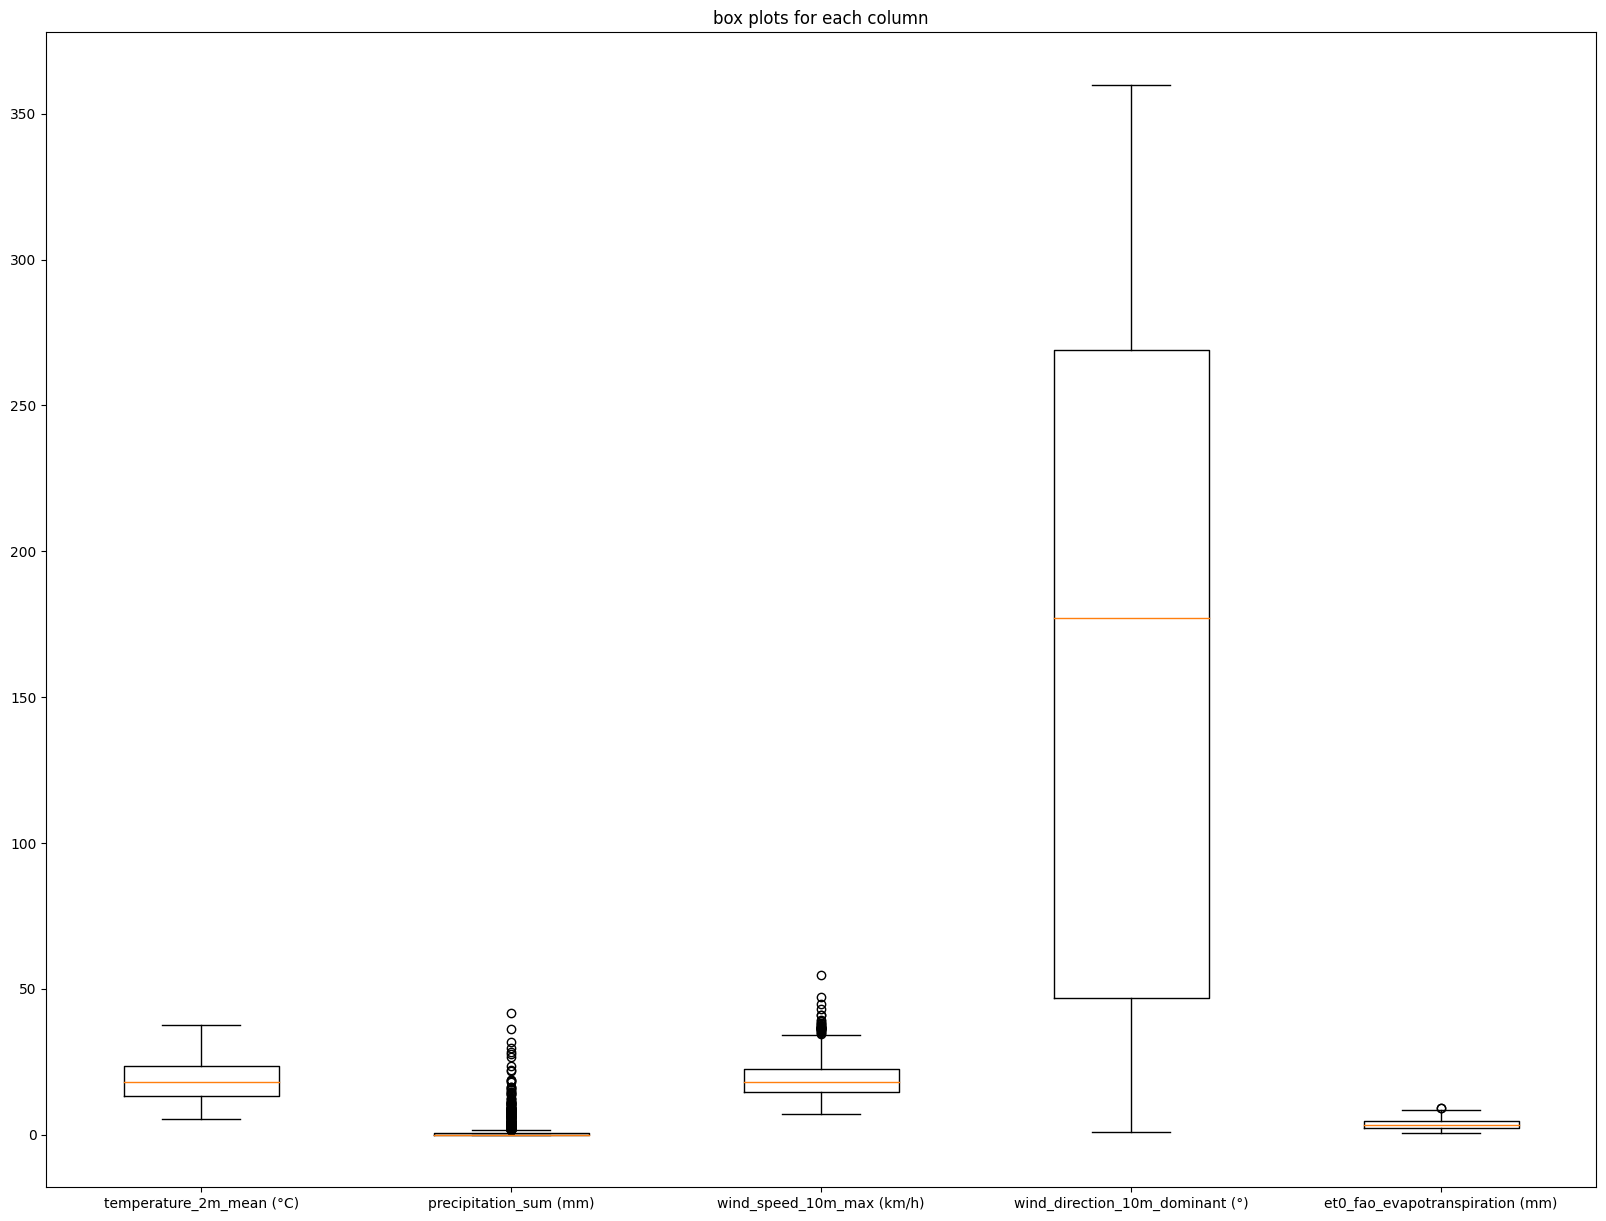

In [18]:
plt.figure(figsize=(20,15))
plt.boxplot(algiers_open_meteo.values,labels=algiers_open_meteo.columns)
plt.title('box plots for each column')
plt.show()

## We notice that precipitation sum and wind speed columns have outliers, so let's keep it as **a note for the modeling stage**, to drop them later but for now let's keep them to have a momre accurate idea of the data

Lets look for correlations to have an idea about the features to choose for modeling and the features to drop

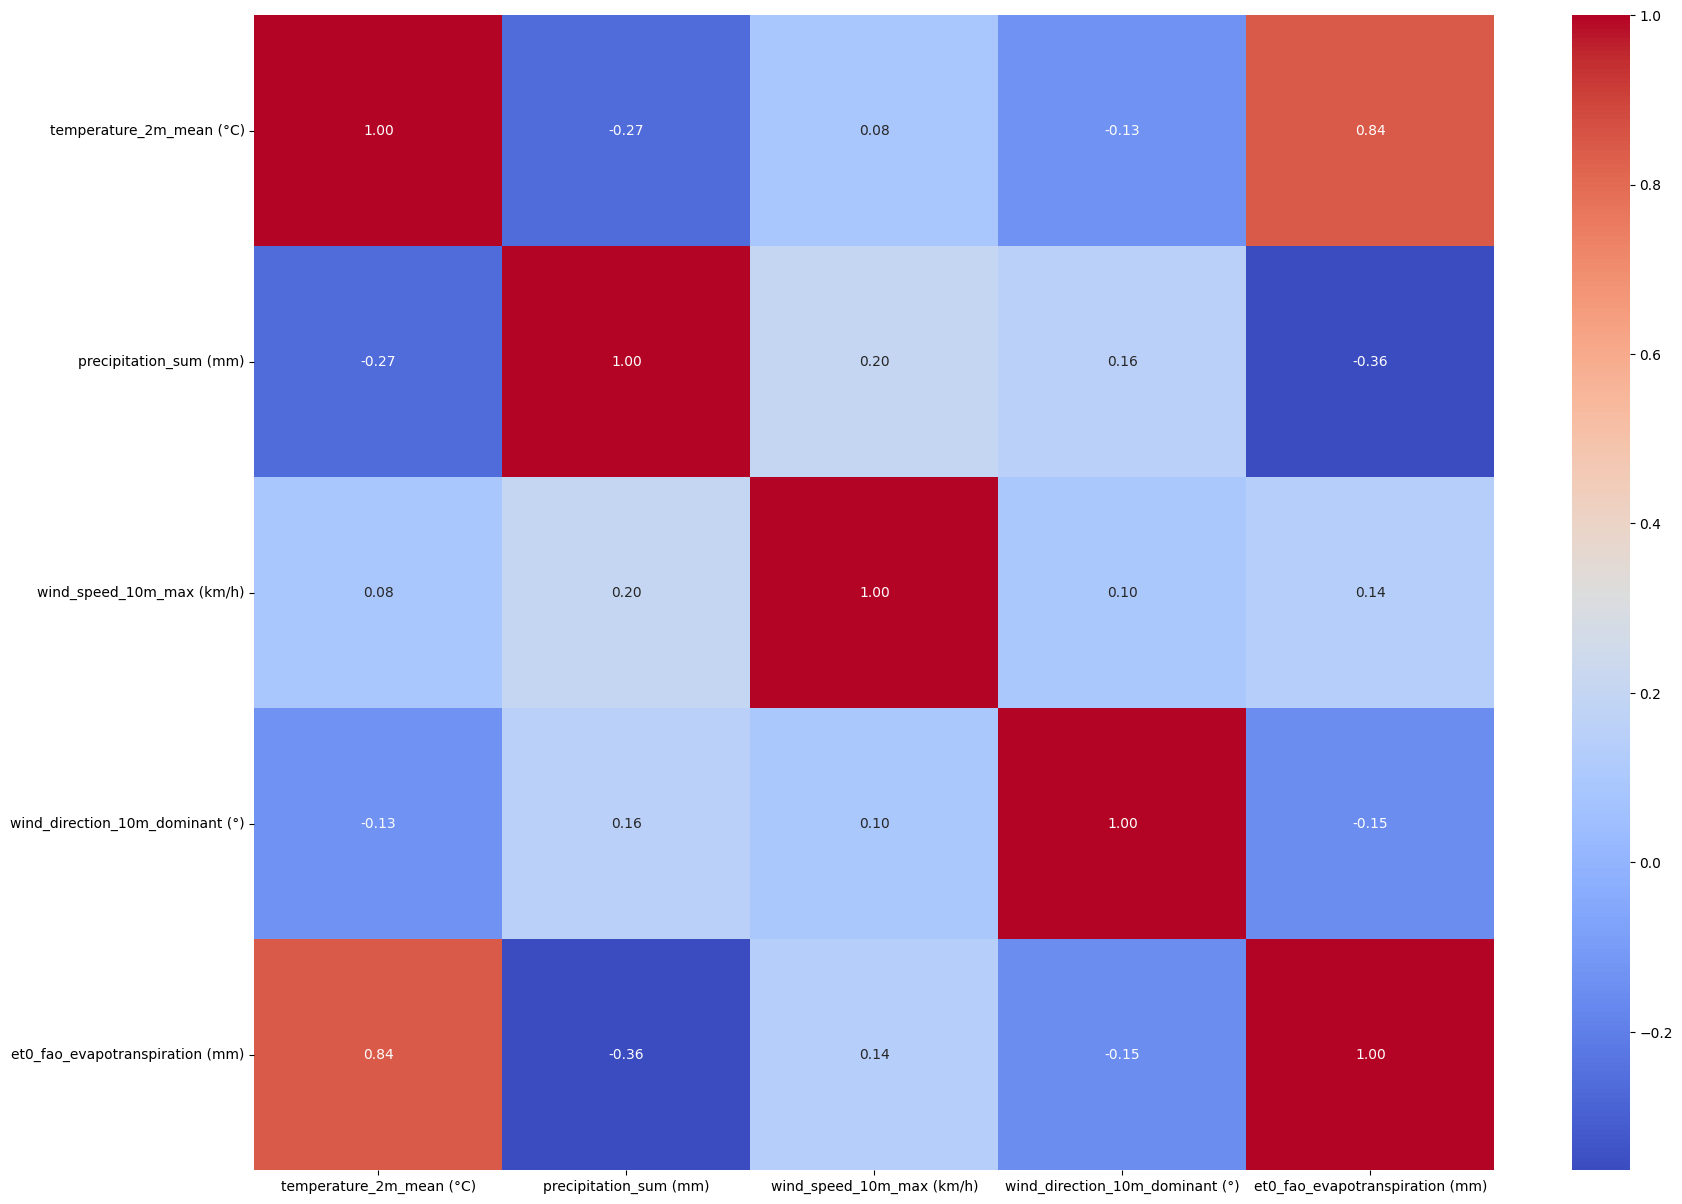

In [20]:
#creating a heatmap
plt.figure(figsize=(20,15))
correlation_matrix=algiers_open_meteo.corr()
sbs.heatmap(correlation_matrix , annot=True, cmap='coolwarm',fmt=".2f")
plt.show()

that's bad we have some columns that doesn't correlate with any other collumns (features) this means we better drop it for instance : wind direction, and wind speed

In [21]:
algiers_open_meteo.columns

Index(['temperature_2m_mean (°C)', 'precipitation_sum (mm)',
       'wind_speed_10m_max (km/h)', 'wind_direction_10m_dominant (°)',
       'et0_fao_evapotranspiration (mm)'],
      dtype='object')

In [23]:
algiers_open_meteo.drop(columns=['wind_speed_10m_max (km/h)','wind_direction_10m_dominant (°)'])

,temperature_2m_mean (°C),precipitation_sum (mm),et0_fao_evapotranspiration (mm)
time,,,
2020-11-19,13.9,0.0,1.78
2020-11-20,13.5,8.0,0.81
2020-11-21,14.7,1.3,2.79
2020-11-22,14.3,1.2,1.94
2020-11-23,12.9,0.0,1.68
...,...,...,...
2023-11-15,17.5,0.0,2.20
2023-11-16,16.8,0.0,2.27
2023-11-17,16.5,0.0,2.17


Let's look for any non linear relashipships between the remaining features

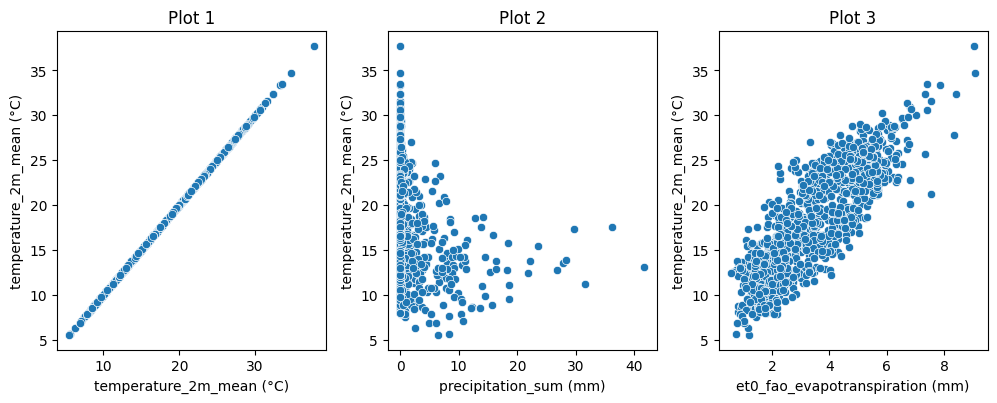

In [37]:
#plotting scatter plot
plt.figure(figsize=(20, 15))
features=['temperature_2m_mean (°C)','precipitation_sum (mm)','et0_fao_evapotranspiration (mm)']
# Loop through each subplot
for i in range(1, 4):
    plt.subplot(4, 6, i)
    sbs.scatterplot(x=features[i-1], y='temperature_2m_mean (°C)', data=algiers_open_meteo)
    plt.title(f'Plot {i}')  # Add a title if needed

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

we don't recognize any non linear relashionship with precipitation ,
we recognize a linear relashionship between evapotranspiration and temperature mean this was apparent in the heatmap which means we can drop one of the features cause in the modeling phase they will give the model the same information

## **Let's look for stationarity**

## What is stationarity ?
A stationary time series has a constant variance and it always returns to the long-run mean. Thus, Stationary time series is more interesting for modeling.

## What is non-stationarity ?
 A time series whose statistical properties change over time is called a non-stationary time series. Thus a time series with a trend or seasonality is non-stationary in nature.

In [34]:
series_weather = algiers_open_meteo['precipitation_sum (mm)']
X = series_weather.values
r = adfuller(X)
print('ADF Statistic for precipitation_sum (mm): %f' % r[0])
print('p-value for precipitation_sum (mm): %f' % r[1])

ADF Statistic for precipitation_sum (mm): -4.970207
p-value for precipitation_sum (mm): 0.000025


In [35]:
series_weather = algiers_open_meteo['temperature_2m_mean (°C)']
X = series_weather.values
r = adfuller(X)
print('ADF Statistic for temperature_2m_mean (°C): %f' % r[0])
print('p-value for temperature_2m_mean (°C): %f' % r[1])

ADF Statistic for temperature_2m_mean (°C): -1.921054
p-value for temperature_2m_mean (°C): 0.322222


In [36]:
series_weather = algiers_open_meteo['et0_fao_evapotranspiration (mm)']
X = series_weather.values
r = adfuller(X)
print('ADF Statistic et0_fao_evapotranspiration (mm): %f' % r[0])
print('p-value et0_fao_evapotranspiration (mm): %f' % r[1])

ADF Statistic et0_fao_evapotranspiration (mm): -2.420952
p-value et0_fao_evapotranspiration (mm): 0.135910


* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

Here both the et0_fao_evapotranspiration and temperature_2m_mean (°C) is stationary whereas precipitation_sum is not stationary which is also apparent when we will plot the data with respect to time

let's look for seasonality ,trend in any of the features it might inform us if its a good decision to opt fot a forecasting model

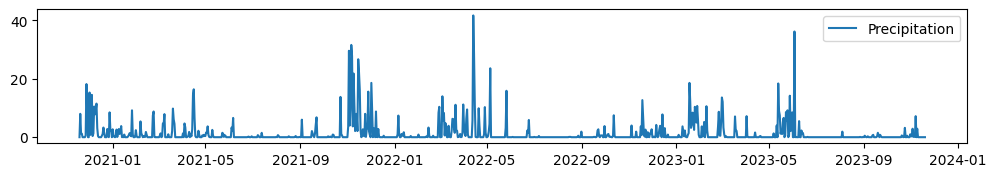

In [30]:
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(algiers_open_meteo['precipitation_sum (mm)'], label='Precipitation')
plt.legend()

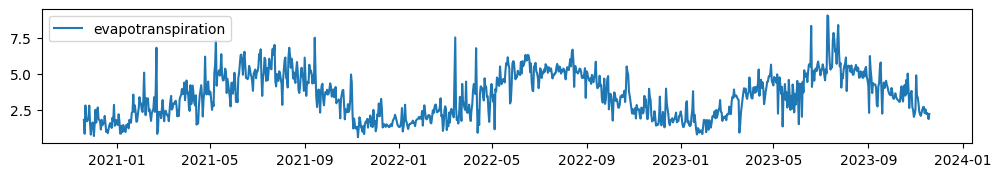

In [31]:
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(algiers_open_meteo['et0_fao_evapotranspiration (mm)'], label='evapotranspiration')
plt.legend()

OKAY!!! finaly something promising

### **What's evapotranspiration in the first place?**
Evapotranspiration is the combined process of water vapor evaporation from the Earth's surface (such as soil, water bodies, and vegetation) and the transpiration of water vapor from plants. It represents the movement of water from the Earth's surface back into the atmosphere in the form of vapor.

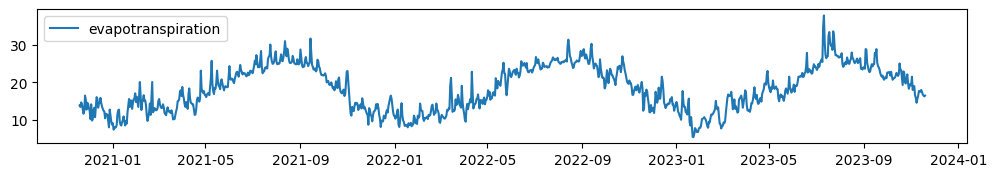

In [32]:
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(algiers_open_meteo['temperature_2m_mean (°C)'], label='evapotranspiration')
plt.legend()

nice  temperature mean also follows a seasonality where it reaches it's mean at jan-march of each month and reaches a peak in august-september of each year

## **Conclusion:**
- we can chose either evapotranspiration or temperature mean and use timeseries forecasting on it (but only one because as we saw earlier these are correlated)

- we can't build a model that correctly predicts precipitation because we don't have any features correlated to it and it's not stationary so using forecasting on it won't yield good results

- wind speed and windirection are collumns to drop cause these don't correlate with any other features thus won't add any value to our model